# Mrunal Aroskar

In [4]:
import pandas as pd

df = pd.read_csv('../data/raw/FIFA-21 Complete.csv' , delimiter = ';')
df

,player_id,name,nationality,position,overall,age,hits,potential,team
0,158023,Lionel Messi,Argentina,ST|CF|RW,94,33,299,94,FC Barcelona
1,20801,Cristiano Ronaldo,Portugal,ST|LW,93,35,276,93,Juventus
2,190871,Neymar Jr,Brazil,CAM|LW,92,28,186,92,Paris Saint-Germain
3,203376,Virgil van Dijk,Netherlands,CB,91,29,127,92,Liverpool
4,200389,Jan Oblak,Slovenia,GK,91,27,47,93,Atlético Madrid
...,...,...,...,...,...,...,...,...,...
17976,256093,Jaime Ortíz,Ecuador,ST,56,21,0,64,Sociedad Deportiva Aucas
17977,256088,Michael Carcelén,Ecuador,CM,56,23,0,64,Club Deportivo El Nacional
17978,256074,Davide Luzi,Venezuela,ST,56,18,1,68,Zamora Fútbol Club
17979,256073,Sergio Sulbarán,Venezuela,RW,56,22,0,62,Zamora Fútbol Club


## Research question/interests

-How do factors like players' age and number of hits affect their overall rating and potential for growth?

## MILESTONE 3

### Task 1

### EDA:

-Here, I will be exploring and superficially manipulating my dataset.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
print("Number of rows and columns in the dataset respectively: ", df.shape)
print("Headings of the coulmns in the dataset: ", df.columns)
df.info()

Number of rows and columns in the dataset respectively:  (17981, 9)
Headings of the coulmns in the dataset:  Index(['player_id', 'name', 'nationality', 'position', 'overall', 'age',
       'hits', 'potential', 'team'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17981 entries, 0 to 17980
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   player_id    17981 non-null  int64 
 1   name         17981 non-null  object
 2   nationality  17981 non-null  object
 3   position     17981 non-null  object
 4   overall      17981 non-null  int64 
 5   age          17981 non-null  int64 
 6   hits         17981 non-null  int64 
 7   potential    17981 non-null  int64 
 8   team         17981 non-null  object
dtypes: int64(5), object(4)
memory usage: 1.2+ MB


In [7]:
print("Numerical Data:")
df.describe().T

Numerical Data:


,count,mean,std,min,25%,50%,75%,max
player_id,17981.0,220912.660531,27738.072671,41.0,204881.0,226753.0,241587.0,256469.0
overall,17981.0,67.274345,5.924392,56.0,63.0,67.0,71.0,94.0
age,17981.0,26.311440,4.556077,17.0,23.0,26.0,30.0,43.0
hits,17981.0,2.689450,10.846286,0.0,0.0,0.0,2.0,371.0
potential,17981.0,71.738057,5.961968,57.0,67.0,71.0,76.0,95.0


In [8]:
print("Number of unique values for each variable:")
df.nunique(axis=0)

Number of unique values for each variable:


player_id      17981
name           17701
nationality      162
position         232
overall           39
age               27
hits             119
potential         39
team             713
dtype: int64

In [9]:
df.describe(include='object').T

,count,unique,top,freq
name,17981,17701,Paulinho,8
nationality,17981,162,England,1496
position,17981,232,CB,2296
team,17981,713,Free Agents,211


In [10]:
print("There is no null data in this dataset")
print(df.isnull().sum())

There is no null data in this dataset
player_id      0
name           0
nationality    0
position       0
overall        0
age            0
hits           0
potential      0
team           0
dtype: int64


A lot of players have zero hits


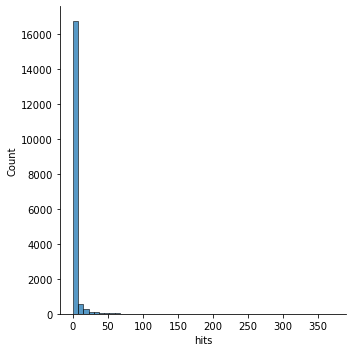

In [11]:
print("A lot of players have zero hits")
sns.displot(df['hits'], kde=False, bins=50)

Graphical representation of potential for growth:


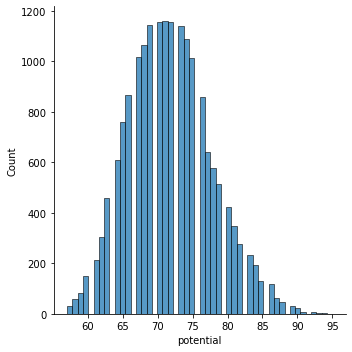

In [12]:
print("Graphical representation of potential for growth:")
sns.displot(df['potential'], kde=False, bins=50)

Graphical representation of the age of players:


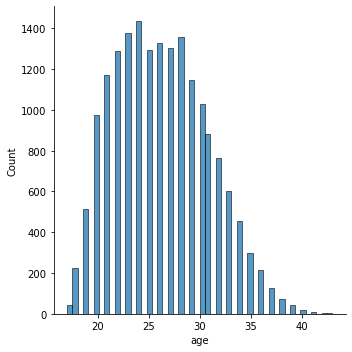

In [13]:
print("Graphical representation of the age of players:")
sns.displot(df['age'], kde=False, bins=50)

There are an abundant amount of people with minimum hits but average potential


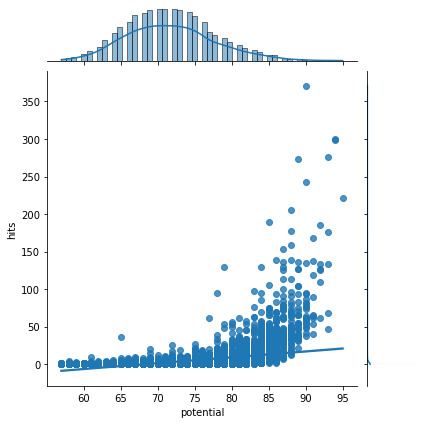

In [14]:
print("There are an abundant amount of people with minimum hits but average potential")
sns.jointplot(x='potential', y='hits', data=df, kind='reg')

This plot is a lot more scattered.


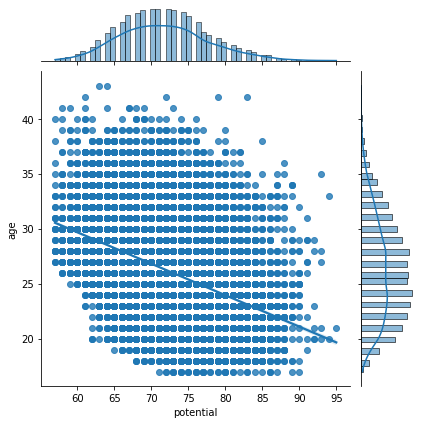

In [15]:
print("This plot is a lot more scattered.")
sns.jointplot(x='potential', y='age', data=df, kind='reg')

### Task 2

### Analysis Pipeline:

In [16]:
#LOAD DATA
df1 = pd.read_csv('../data/raw/FIFA-21 Complete.csv' , delimiter = ';')

In [17]:
#CLEAN DATA
df2=df1.drop(labels=['player_id', 'nationality', 'position', 'team'], axis=1)

In [18]:
df2=df2.dropna(axis=0)

In [19]:
df3=df2.drop_duplicates(subset=['overall','hits','age','potential'], keep='first', inplace=False, ignore_index=True)
df3

,name,overall,age,hits,potential
0,Lionel Messi,94,33,299,94
1,Cristiano Ronaldo,93,35,276,93
2,Neymar Jr,92,28,186,92
3,Virgil van Dijk,91,29,127,92
4,Jan Oblak,91,27,47,93
...,...,...,...,...,...
6093,Jaime Ortíz,56,21,0,64
6094,Michael Carcelén,56,23,0,64
6095,Davide Luzi,56,18,1,68
6096,Sergio Sulbarán,56,22,0,62


In [24]:
#PROCESS DATA
df3=df3.insert(len(df3.columns), 'potential-overall', df3.potential-df3.overall, allow_duplicates=False)

AttributeError: 'NoneType' object has no attribute 'insert'

In [25]:
df3

In [26]:
#WRANGLE DATA
df3.rename(columns={"overall": "overall rating", "potential": "potential growth"})

AttributeError: 'NoneType' object has no attribute 'rename'

### Task 3

### Method Chaining and Writing Python Programs:

#### Step 1

In [27]:
import project_functions3 as p3

In [28]:
print("Unprocessed data:")
p3.unprocessed('../data/raw/FIFA-21 Complete.csv')

Unprocessed data:


,player_id,name,nationality,position,overall,age,hits,potential,team
0,158023,Lionel Messi,Argentina,ST|CF|RW,94,33,299,94,FC Barcelona
1,20801,Cristiano Ronaldo,Portugal,ST|LW,93,35,276,93,Juventus
2,190871,Neymar Jr,Brazil,CAM|LW,92,28,186,92,Paris Saint-Germain
3,203376,Virgil van Dijk,Netherlands,CB,91,29,127,92,Liverpool
4,200389,Jan Oblak,Slovenia,GK,91,27,47,93,Atlético Madrid
...,...,...,...,...,...,...,...,...,...
17976,256093,Jaime Ortíz,Ecuador,ST,56,21,0,64,Sociedad Deportiva Aucas
17977,256088,Michael Carcelén,Ecuador,CM,56,23,0,64,Club Deportivo El Nacional
17978,256074,Davide Luzi,Venezuela,ST,56,18,1,68,Zamora Fútbol Club
17979,256073,Sergio Sulbarán,Venezuela,RW,56,22,0,62,Zamora Fútbol Club


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Step 2

In [30]:
print("Processed data:")
data = p3.loadandprocess('../data/raw/FIFA-21 Complete.csv')
data

Processed data:


,name,OverallRating,age,hits,PotentialGrowth,Potential-Overall
0,Lionel Messi,94,33,299,94,0
1,Cristiano Ronaldo,93,35,276,93,0
2,Neymar Jr,92,28,186,92,0
3,Virgil van Dijk,91,29,127,92,1
4,Jan Oblak,91,27,47,93,2
...,...,...,...,...,...,...
6093,Jaime Ortíz,56,21,0,64,8
6094,Michael Carcelén,56,23,0,64,8
6095,Davide Luzi,56,18,1,68,12
6096,Sergio Sulbarán,56,22,0,62,6


In [40]:
#saving the processed dataset in the directory
data.to_csv("../data/processed/Mrunal_processed_data.csv", index=False)

#### Step 3

Transferred the method function to the project_functions3.py file.

### Task 4

### Data Analysis:

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [32]:
data.info()
print("Number of rows and columns in the dataset respectively: ", data.shape)
print("Headings of the coulmns in the dataset: ", data.columns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6098 entries, 0 to 6097
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   name               6098 non-null   object
 1   OverallRating      6098 non-null   int64 
 2   age                6098 non-null   int64 
 3   hits               6098 non-null   int64 
 4   PotentialGrowth    6098 non-null   int64 
 5   Potential-Overall  6098 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 286.0+ KB
Number of rows and columns in the dataset respectively:  (6098, 6)
Headings of the coulmns in the dataset:  Index(['name', 'OverallRating', 'age', 'hits', 'PotentialGrowth',
       'Potential-Overall'],
      dtype='object')


In [33]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
OverallRating,6098.0,69.104788,7.312783,56.0,63.0,69.0,75.0,94.0
age,6098.0,25.113152,4.825203,17.0,21.0,24.0,28.0,43.0
hits,6098.0,6.878977,17.808729,0.0,0.0,2.0,5.0,371.0
PotentialGrowth,6098.0,75.090849,6.800728,57.0,70.0,76.0,80.0,95.0
Potential-Overall,6098.0,5.986061,5.571134,0.0,1.0,5.0,10.0,25.0


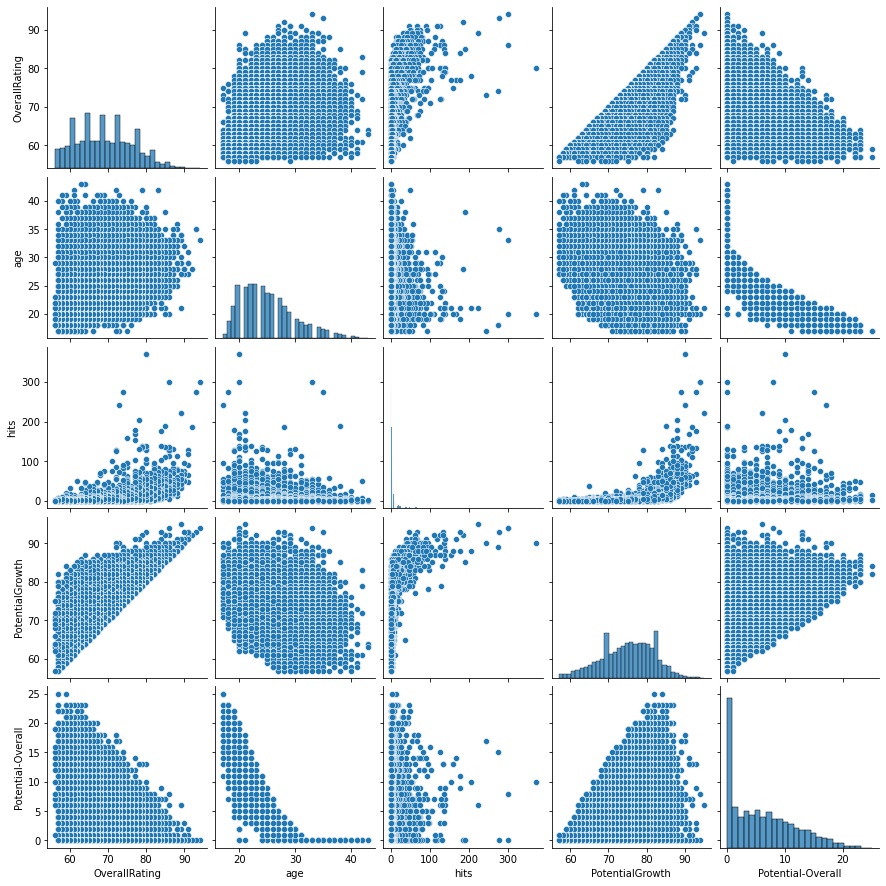

In [34]:
sns.pairplot(data)

#### Pair Plot Analysis:

- AGE:

- We infer that age equally affects the potential growth and the overall rating of the players on a large scale.

- On observing the relation of age with the plot of (potential-overall), we can conclude that, younger players have more chances to increase their rating compared to older players.

- HITS:

- Quite some players are seen to have a pretty good rating, even if they do not have any hits. But, a lot more players have more potential for growth.

- On observing the relation of age with the plot of (potential-overall), we can conclude that, similar to the age factor, the players with lesser hits have, not a a lot, but few chances to increase their rating.

<AxesSubplot:title={'center':'For age:'}, xlabel='Potential-Overall', ylabel='Age'>

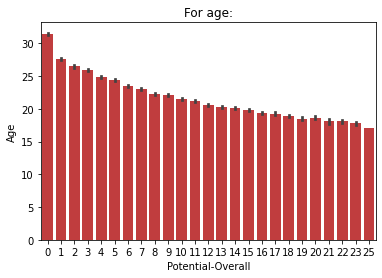

In [35]:
p = sns.barplot(x="Potential-Overall", y="age", data=data, color="tab:red")
p.set_title("For age:")
p.set_xlabel("Potential-Overall")
p.set_ylabel("Age")
p

- We can clearly see that younger players have more chances of potential growth

<AxesSubplot:title={'center':'For hits:'}, xlabel='Potential-Overall', ylabel='Hits'>

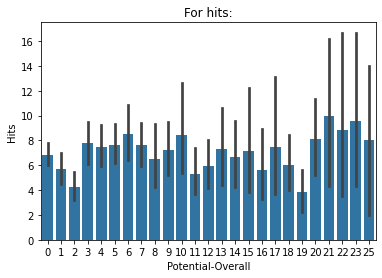

In [36]:
q = sns.barplot(x="Potential-Overall", y="hits", data=data, color="tab:blue")
q.set_title("For hits:")
q.set_xlabel("Potential-Overall")
q.set_ylabel("Hits")
q

- It's not as linear as the graph for age. Here we see that, even though players have very few hits, they have a good rating but not as much chances of potential growth

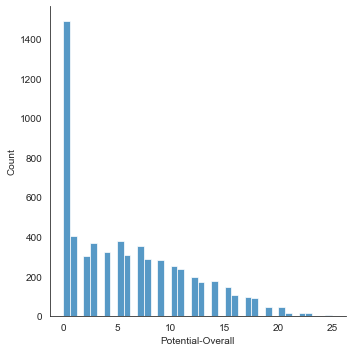

In [37]:
sns.set_style('white')

sns.displot(data['Potential-Overall'], kde=False, bins=40)


- Finally, if we look at only the difference between potential and ratings, then we know that over 1400 players have hardly any potential to further grow. 

##### Therefore, we conclude that number of hits is a very fluctuating factor and hence does not help much in affecting the ratings as well as the potential of the players

##### Age, on the other hand is a significant contributing factor to, not only the players' ratings but also their potential to grow in the future.